# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Lineer Regression Project 2 (Auto Scout)</b></p>

# About the Dataset


1. **make_model**: Contains the make and model information of the vehicles.
2. **body_type**: Indicates the body type of the vehicles (e.g., sedan, hatchback).
3. **price**: Contains the price information of the vehicles.
4. **vat**: Contains value-added tax (VAT) information (often important in vehicle sales).
5. **km**: Contains the mileage information of the vehicles.
6. **Type**: Indicates the type of the vehicle (e.g., new, used).
7. **Fuel**: Indicates the type of fuel used (e.g., petrol, diesel).
8. **Gears**: Contains the number of gears in the vehicles.
9. **Comfort_Convenience**: Contains the comfort and convenience features of the vehicles.
10. **Entertainment_Media**: Contains entertainment and media features.
11. **Extras**: Contains the extra features of the vehicles.
12. **Safety_Security**: Contains safety features.
13. **age**: The age of the vehicles.
14. **Previous_Owners**: Contains the number of previous owners of the vehicles.
15. **hp_kW**: Contains the horsepower of the vehicles in kilowatts.
16. **Inspection_new**: Contains information about whether the vehicle has a new inspection.
17. **Paint_Type**: Contains the type of paint of the vehicles.
18. **Upholstery_type**: Contains the type of upholstery in the vehicles.
19. **Gearing_Type**: Indicates the type of transmission in the vehicles.
20. **Displacement_cc**: Indicates the engine displacement in cubic centimeters (cc).
21. **Weight_kg**: Indicates the weight of the vehicles in kilograms.
22. **Drive_chain**: Indicates the type of drive train in the vehicles (e.g., front-wheel drive, rear-wheel drive).
23. **cons_comb**: Indicates the combined fuel consumption of the vehicles in liters per 100 kilometers.

# Tasks

- 1. Import Modules, Load Data and Data Review

- 2. EDA

- 3. Train | Test Split

- 4. Implement Linear Regression

- 5. Implement Ridge Regression

- 6. Implement Lasso Regression

- 7. Implement Elastic-Net

- 8. Visually Compare Models Performance In a Graph

- 9. Feature Importance

- 10. Compare Models Performance
 
- 11. Final Model

- 12. Prediction

# Import Modules, Load Data and Data Review

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
 
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

In [9]:
car = pd.read_csv('final_scout_not_dummy.csv')
df = car.copy()

In [10]:
df.head()

make_model body_type  price               vat       km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible  56013.0  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable  80000.0  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible  83450.0  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible  73000.0  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible  16200.0  Used   Diesel   

   Gears                                Comfort_Convenience  \
0    7.0  Air conditioning,Armrest,Automatic climate con...   
1    7.0  Air conditioning,Automatic climate control,Hil...   
2    7.0  Air conditioning,Cruise control,Electrical sid...   
3    6.0  Air suspension,Armrest,Auxiliary heating,Elect...   
4    7.0  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  ... Previous_Owners  \
0  Bluetooth,Hands-free equipment,On-board comput...  ...             2.0   
1  Bluetooth,Hands-free equipment,On-board comput...  ...             1.0   
2                              MP3,On-board computer  ...             1.0   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...  ...             1.0   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...  ...             1.0   

   hp_kW  Inspection_new  Paint_Type  Upholstery_type  Gearing_Type  \
0   66.0               1    Metallic            Cloth     Automatic   
1  141.0               0    Metallic            Cloth     Automatic   
2   85.0               0    Metallic            Cloth     Automatic   
3   66.0               0    Metallic            Cloth     Automatic   
4   66.0               1    Metallic            Cloth     Automatic   

  Displacement_cc Weight_kg Drive_chain  cons_comb  
0          1422.0    1220.0       front        3.8  
1          1798.0    1255.0       front        5.6  
2          1598.0    1135.0       front        3.8  
3          1422.0    1195.0       front        3.8  
4          1422.0    1135.0       front        4.1  

[5 rows x 23 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [12]:
df.shape

(15915, 23)

In [13]:
df.describe().T

count          mean           std     min      25%  \
price            15915.0  18024.380584   7381.679318  4950.0  12850.0   
km               15915.0  32089.995708  36977.214964     0.0   1920.5   
Gears            15915.0      5.937355      0.704772     5.0      5.0   
age              15915.0      1.389695      1.121306     0.0      0.0   
Previous_Owners  15915.0      1.042853      0.339178     0.0      1.0   
hp_kW            15915.0     88.499340     26.674341    40.0     66.0   
Inspection_new   15915.0      0.247063      0.431317     0.0      0.0   
Displacement_cc  15915.0   1428.661891    275.804272   890.0   1229.0   
Weight_kg        15915.0   1337.700534    199.682385   840.0   1165.0   
cons_comb        15915.0      4.832124      0.867530     3.0      4.1   

                     50%      75%       max  
price            16900.0  21900.0   74600.0  
km               20413.0  46900.0  317000.0  
Gears                6.0      6.0       8.0  
age                  1.0      2.0       3.0  
Previous_Owners      1.0      1.0       4.0  
hp_kW               85.0    103.0     294.0  
Inspection_new       0.0      0.0       1.0  
Displacement_cc   1461.0   1598.0    2967.0  
Weight_kg         1295.0   1472.0    2471.0  
cons_comb            4.8      5.4       9.1

In [14]:
df.columns = df.columns.str.lower()

In [15]:
df.head()

make_model body_type  price               vat       km  type     fuel  \
0    Audi A1    Sedans  15770    VAT deductible  56013.0  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable  80000.0  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible  83450.0  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible  73000.0  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible  16200.0  Used   Diesel   

   gears                                comfort_convenience  \
0    7.0  Air conditioning,Armrest,Automatic climate con...   
1    7.0  Air conditioning,Automatic climate control,Hil...   
2    7.0  Air conditioning,Cruise control,Electrical sid...   
3    6.0  Air suspension,Armrest,Auxiliary heating,Elect...   
4    7.0  Air conditioning,Armrest,Automatic climate con...   

                                 entertainment_media  ... previous_owners  \
0  Bluetooth,Hands-free equipment,On-board comput...  ...             2.0   
1  Bluetooth,Hands-free equipment,On-board comput...  ...             1.0   
2                              MP3,On-board computer  ...             1.0   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...  ...             1.0   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...  ...             1.0   

   hp_kw  inspection_new  paint_type  upholstery_type  gearing_type  \
0   66.0               1    Metallic            Cloth     Automatic   
1  141.0               0    Metallic            Cloth     Automatic   
2   85.0               0    Metallic            Cloth     Automatic   
3   66.0               0    Metallic            Cloth     Automatic   
4   66.0               1    Metallic            Cloth     Automatic   

  displacement_cc weight_kg drive_chain  cons_comb  
0          1422.0    1220.0       front        3.8  
1          1798.0    1255.0       front        5.6  
2          1598.0    1135.0       front        3.8  
3          1422.0    1195.0       front        3.8  
4          1422.0    1135.0       front        4.1  

[5 rows x 23 columns]

# EDA

## make_model 

In [18]:
df.make_model.unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

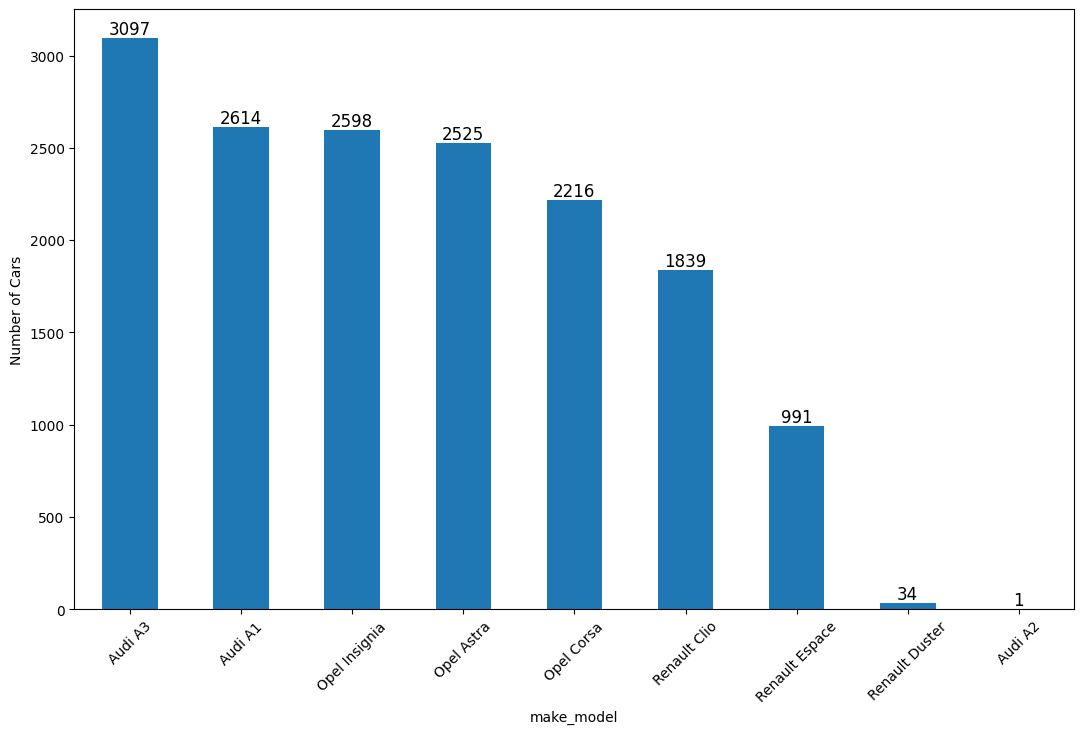

In [19]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.make_model.value_counts().sort_values(ascending=False).head(9) 
counts.plot(kind = "bar")
plt.xlabel('make_model') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

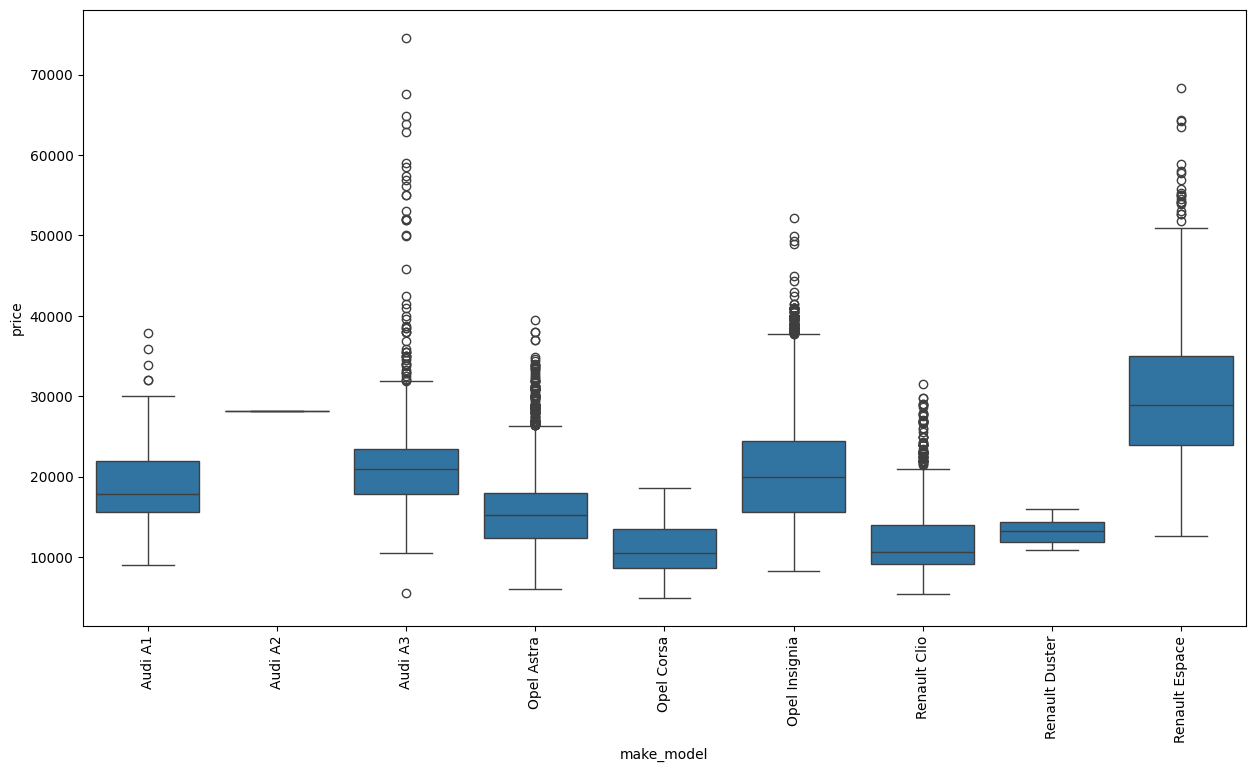

In [20]:
plt.figure(figsize = (15,8))
sns.boxplot(x="make_model", y="price", data=df)
plt.xticks(rotation = 90);


## body_type 

In [22]:
df.body_type.unique()

array(['Sedans', 'Station wagon', 'Compact', 'Coupe', 'Van', 'Off-Road',
       'Convertible', 'Transporter'], dtype=object)

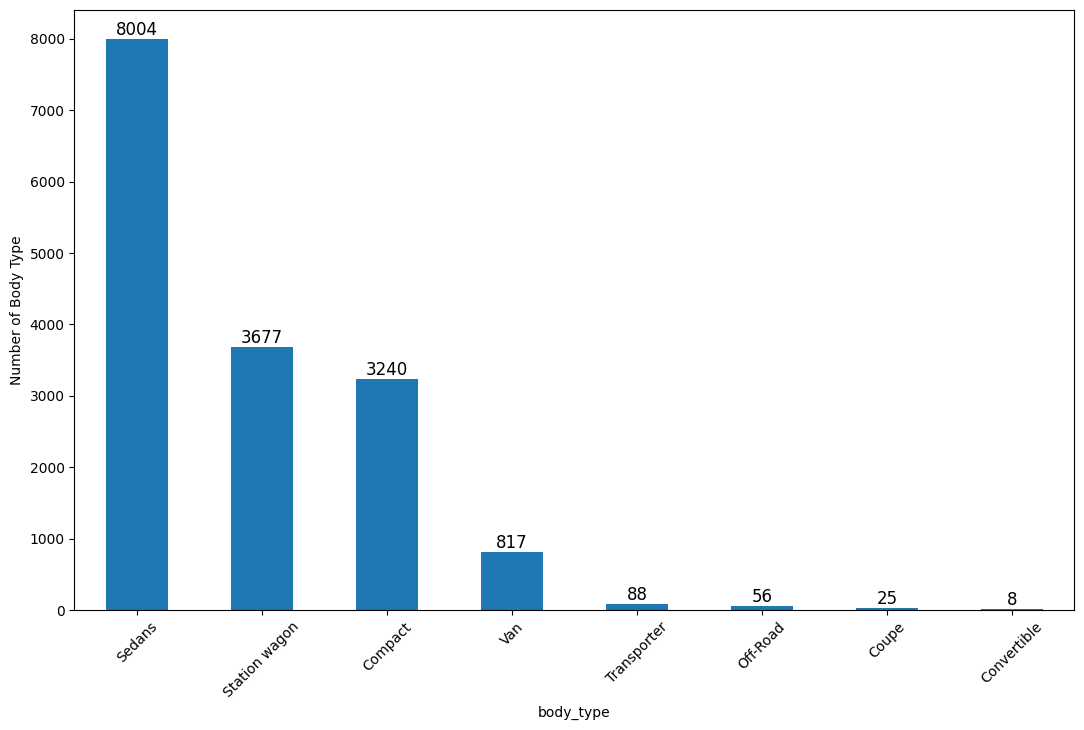

In [23]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.body_type.value_counts().sort_values(ascending=False).head(10) # [0:10]
counts.plot(kind = "bar")
plt.xlabel('body_type') 
plt.ylabel('Number of Body Type')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## vat

In [25]:
df.vat.unique()

array(['VAT deductible', 'Price negotiable'], dtype=object)

In [26]:
transmission_distr = df['vat'].value_counts().reset_index(name='count')
transmission_distr.columns = ['vat', 'count'] 

fig = px.pie(transmission_distr, values='count', names='vat', title="Vat Distribution")
fig.show()

## km

In [28]:
df.km

0        56013.000000
1        80000.000000
2        83450.000000
3        73000.000000
4        16200.000000
             ...     
15910     1647.362609
15911     9900.000000
15912       15.000000
15913       10.000000
15914     1647.362609
Name: km, Length: 15915, dtype: float64

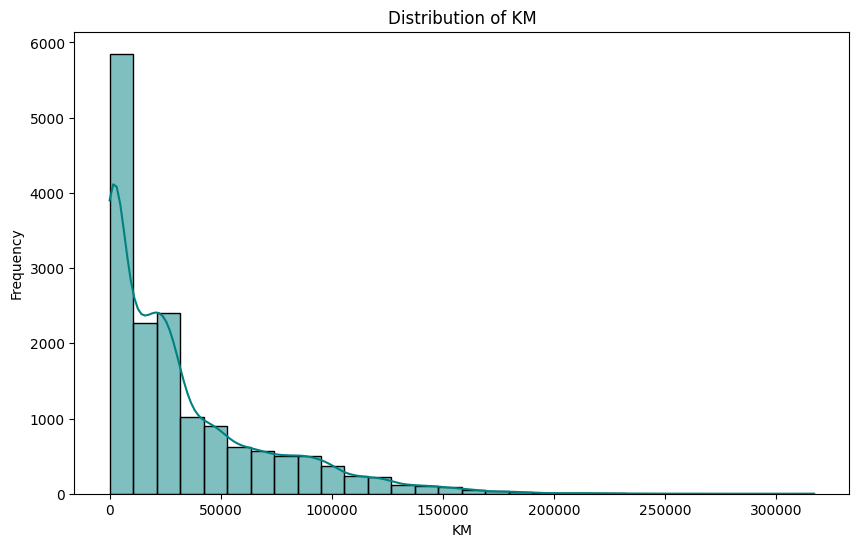

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['km'], kde=True, bins=30, color='teal')
plt.title('Distribution of KM')
plt.xlabel('KM')
plt.ylabel('Frequency')
plt.show()

## type

In [31]:
df.type.unique()

array(['Used', "Employee's car", 'New', 'Demonstration', 'Pre-registered'],
      dtype=object)

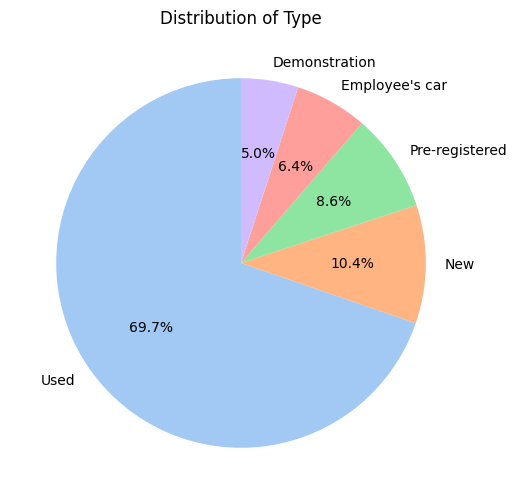

In [32]:
# Creating a pie chart to see the distribution of the "type" variable
plt.figure(figsize=(10, 6))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Type')
plt.ylabel('')  
plt.show()

In [33]:
df.head()

make_model body_type  price               vat       km  type     fuel  \
0    Audi A1    Sedans  15770    VAT deductible  56013.0  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable  80000.0  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible  83450.0  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible  73000.0  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible  16200.0  Used   Diesel   

   gears                                comfort_convenience  \
0    7.0  Air conditioning,Armrest,Automatic climate con...   
1    7.0  Air conditioning,Automatic climate control,Hil...   
2    7.0  Air conditioning,Cruise control,Electrical sid...   
3    6.0  Air suspension,Armrest,Auxiliary heating,Elect...   
4    7.0  Air conditioning,Armrest,Automatic climate con...   

                                 entertainment_media  ... previous_owners  \
0  Bluetooth,Hands-free equipment,On-board comput...  ...             2.0   
1  Bluetooth,Hands-free equipment,On-board comput...  ...             1.0   
2                              MP3,On-board computer  ...             1.0   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...  ...             1.0   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...  ...             1.0   

   hp_kw  inspection_new  paint_type  upholstery_type  gearing_type  \
0   66.0               1    Metallic            Cloth     Automatic   
1  141.0               0    Metallic            Cloth     Automatic   
2   85.0               0    Metallic            Cloth     Automatic   
3   66.0               0    Metallic            Cloth     Automatic   
4   66.0               1    Metallic            Cloth     Automatic   

  displacement_cc weight_kg drive_chain  cons_comb  
0          1422.0    1220.0       front        3.8  
1          1798.0    1255.0       front        5.6  
2          1598.0    1135.0       front        3.8  
3          1422.0    1195.0       front        3.8  
4          1422.0    1135.0       front        4.1  

[5 rows x 23 columns]

## fuel

In [35]:
df.fuel.unique()

array(['Diesel', 'Benzine', 'LPG/CNG', 'Electric'], dtype=object)

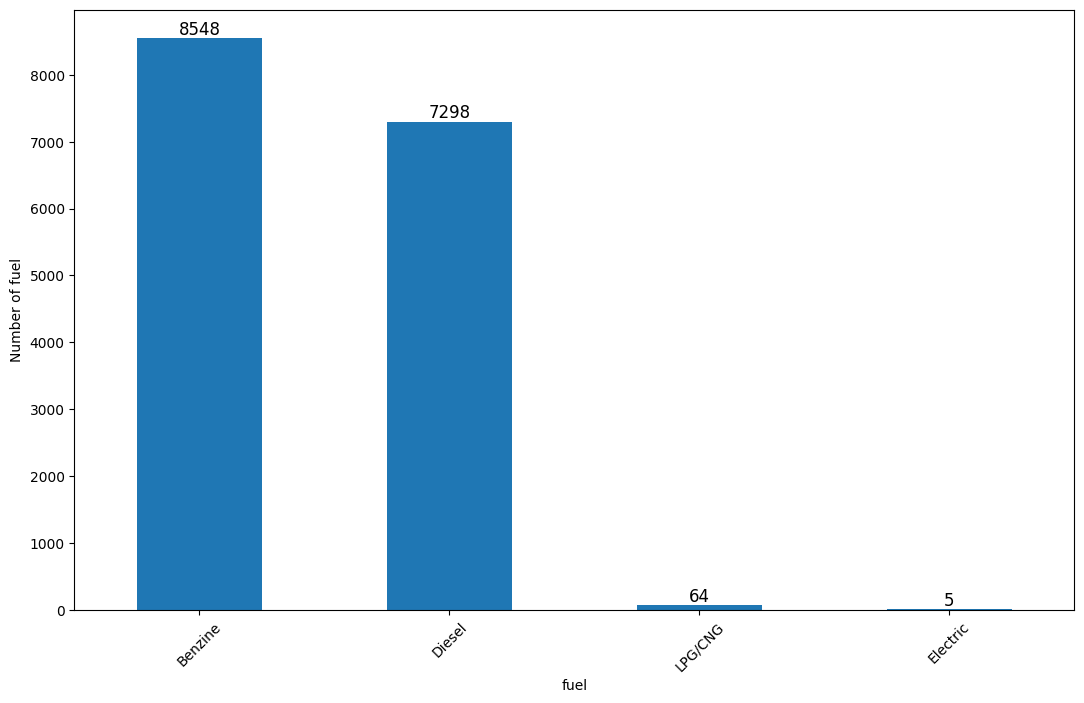

In [36]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.fuel.value_counts().sort_values(ascending=False).head(9) 
counts.plot(kind = "bar")
plt.xlabel('fuel') 
plt.ylabel('Number of fuel')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## price

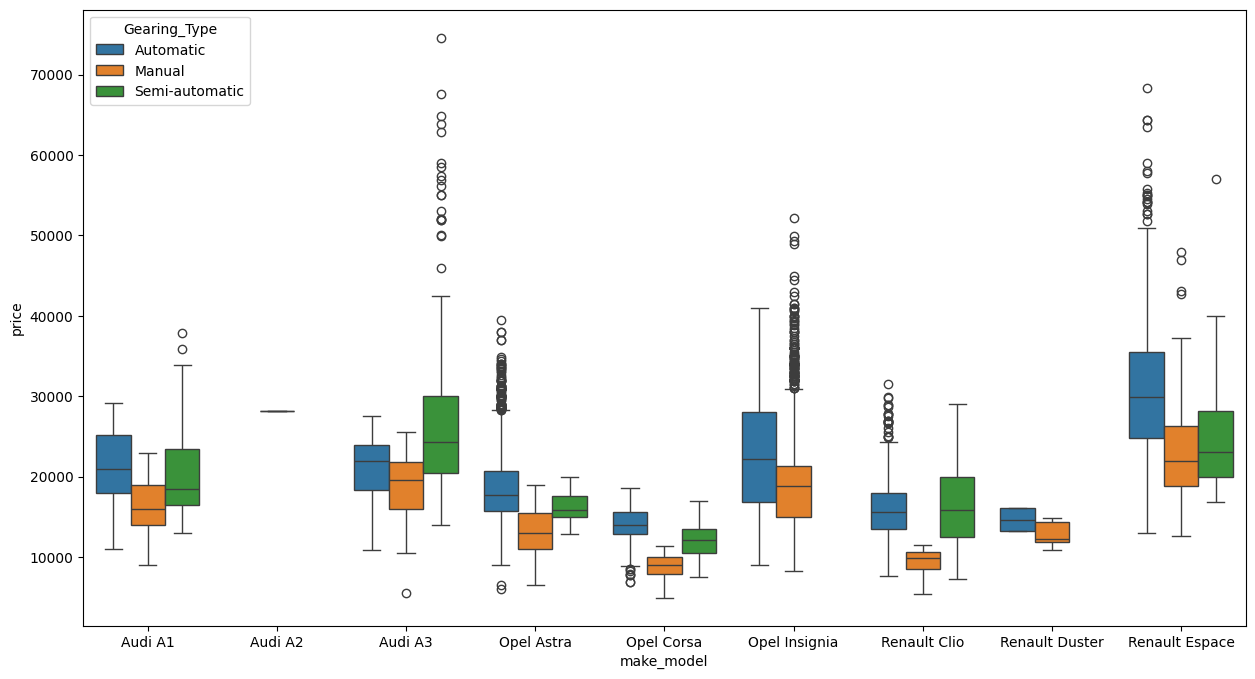

In [40]:
plt.figure(figsize=(15,8))
sns.boxplot(x='make_model', y='price', data=car, hue='Gearing_Type');

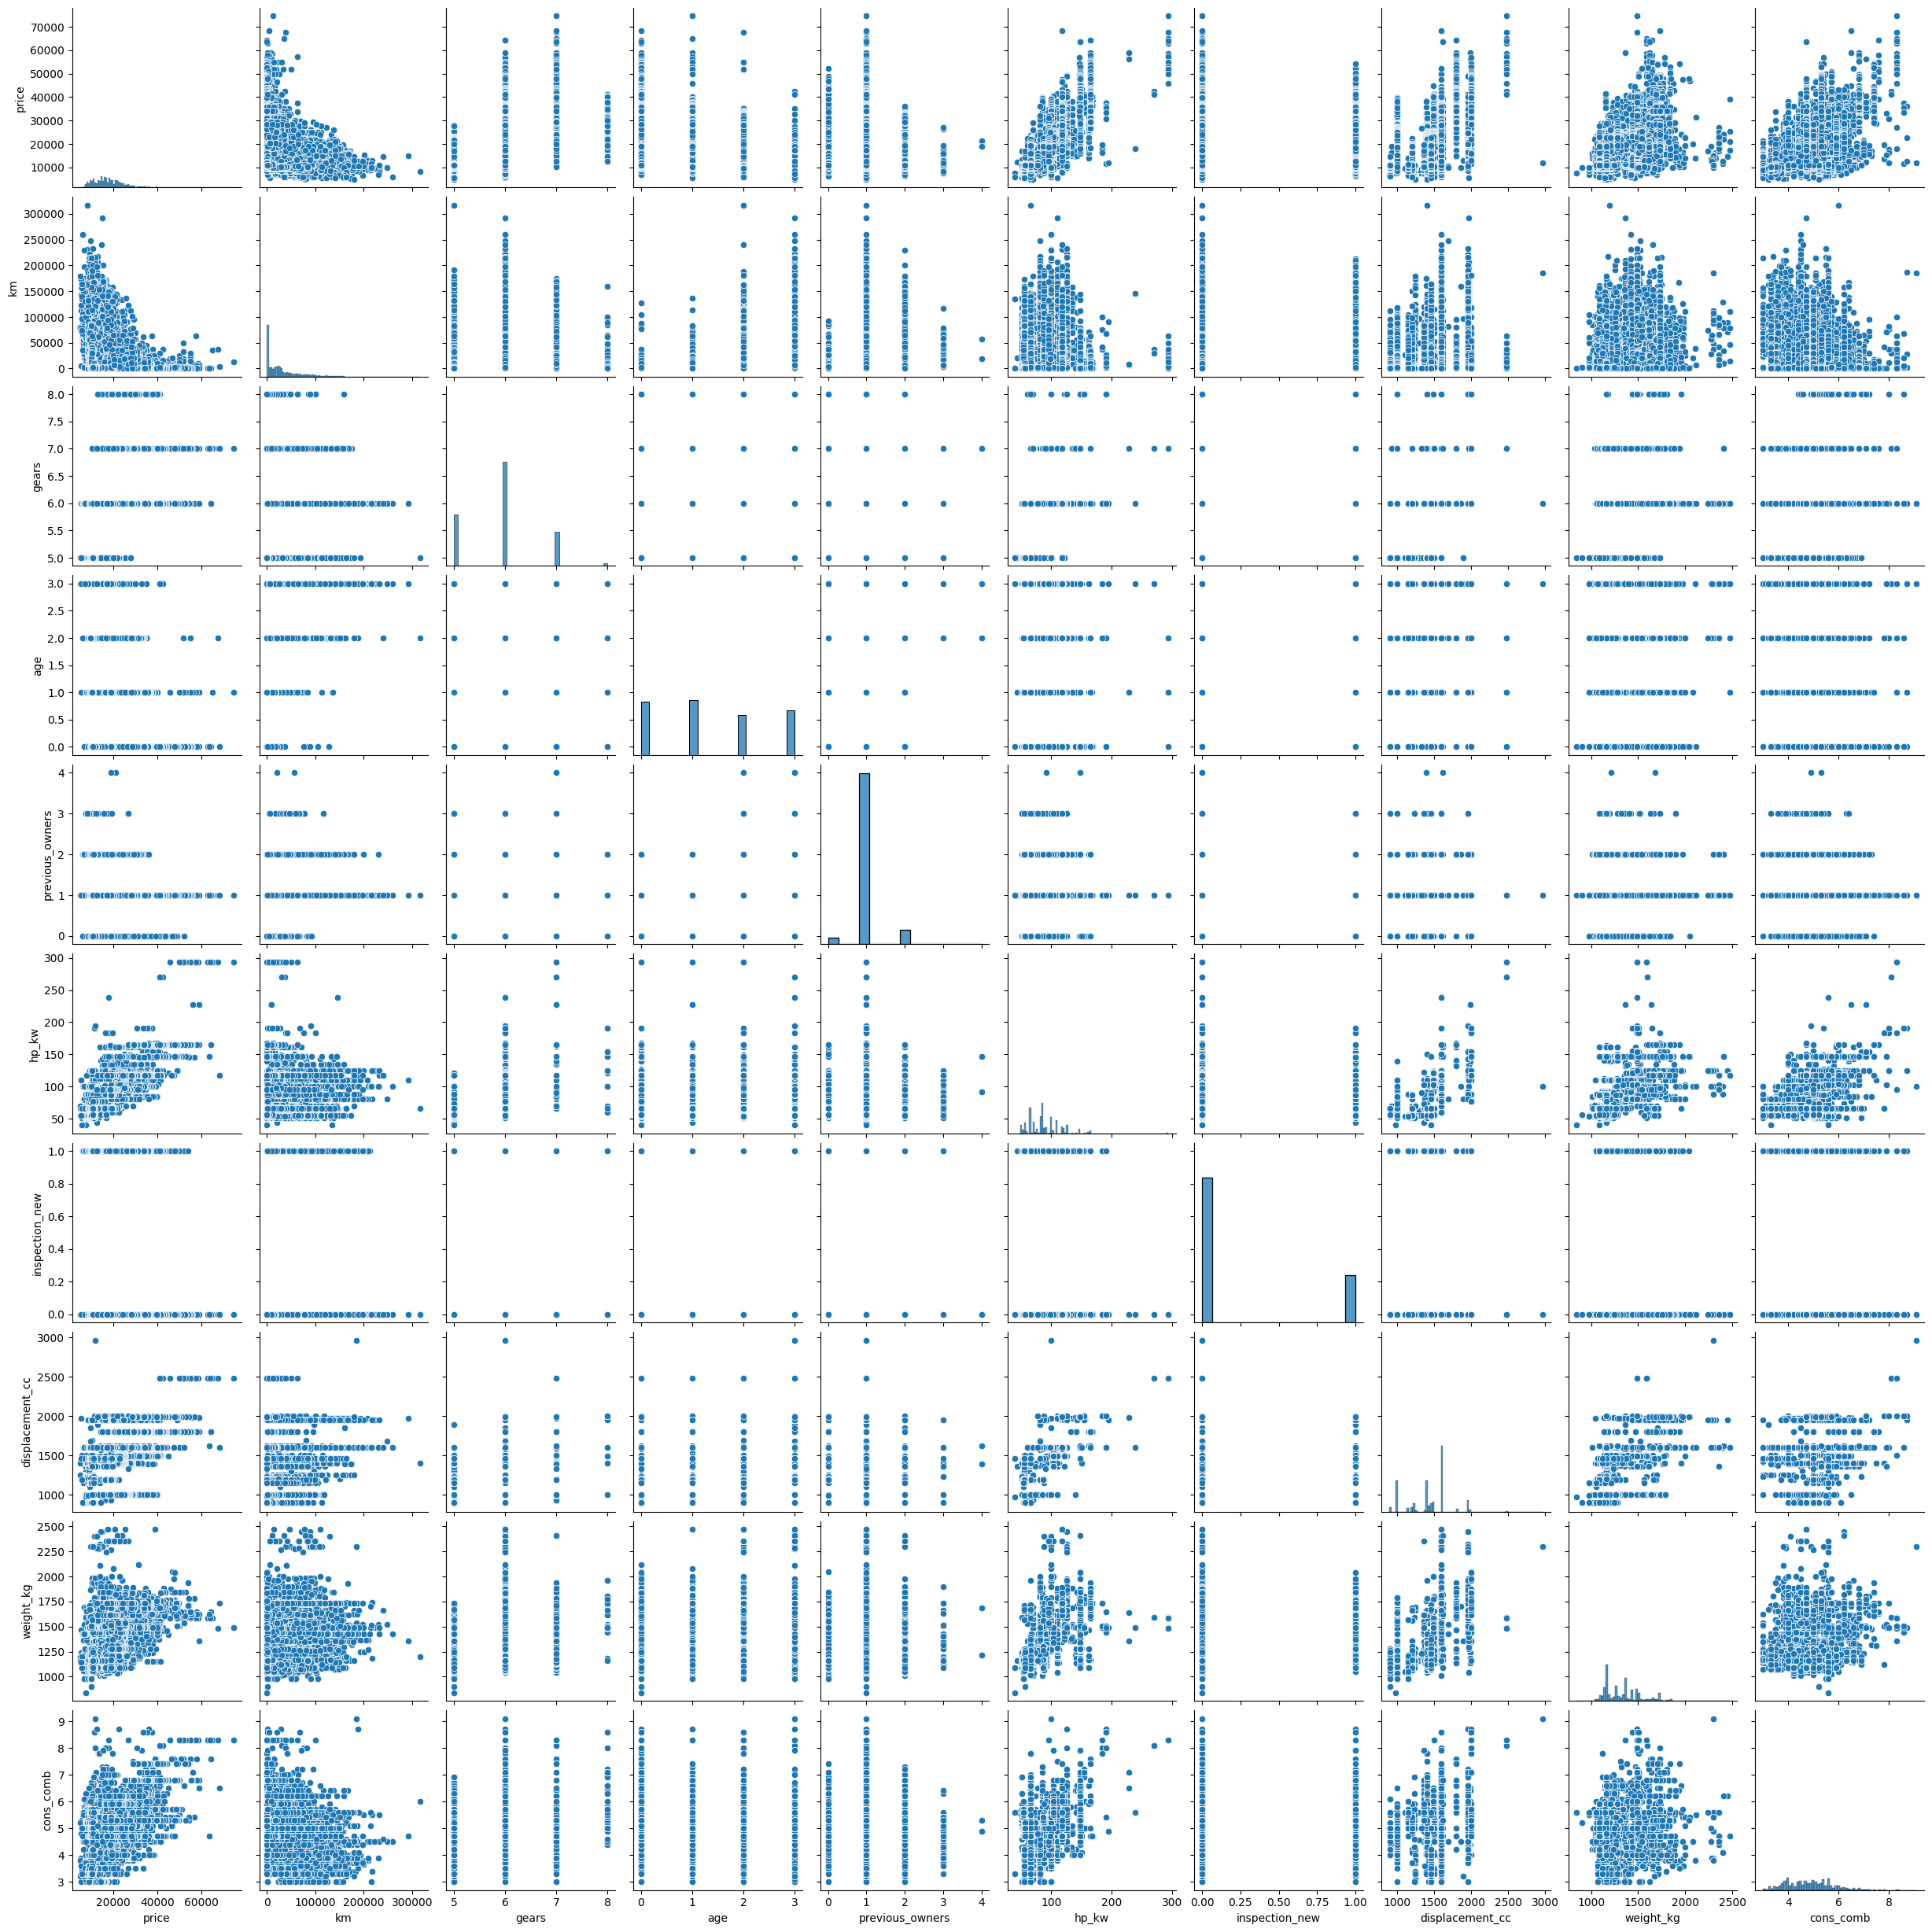

In [41]:
sns.pairplot(df);

In [42]:
df[df.price == df.price.min()]

make_model body_type  price             vat        km  type    fuel  \
8825  Opel Corsa    Sedans   4950  VAT deductible  179521.0  Used  Diesel   

      gears                                comfort_convenience  \
8825    5.0  Air conditioning,Automatic climate control,Ele...   

                                entertainment_media  ... previous_owners  \
8825  Bluetooth,CD player,MP3,On-board computer,USB  ...             1.0   

     hp_kw  inspection_new  paint_type  upholstery_type  gearing_type  \
8825  70.0               0    Metallic            Cloth        Manual   

     displacement_cc weight_kg drive_chain  cons_comb  
8825          1248.0    1163.0       front        3.2  

[1 rows x 23 columns]

In [43]:
df[df.price == df.price.max()]

make_model body_type  price             vat       km  type     fuel  \
3648    Audi A3    Sedans  74600  VAT deductible  13000.0  Used  Benzine   

      gears                                comfort_convenience  \
3648    7.0  Air conditioning,Armrest,Automatic climate con...   

                    entertainment_media  ... previous_owners  hp_kw  \
3648  CD player,On-board computer,Radio  ...             1.0  294.0   

      inspection_new  paint_type    upholstery_type    gearing_type  \
3648               0    Metallic  Part/Full Leather  Semi-automatic   

     displacement_cc weight_kg drive_chain  cons_comb  
3648          2480.0    1490.0         4WD        8.3  

[1 rows x 23 columns]

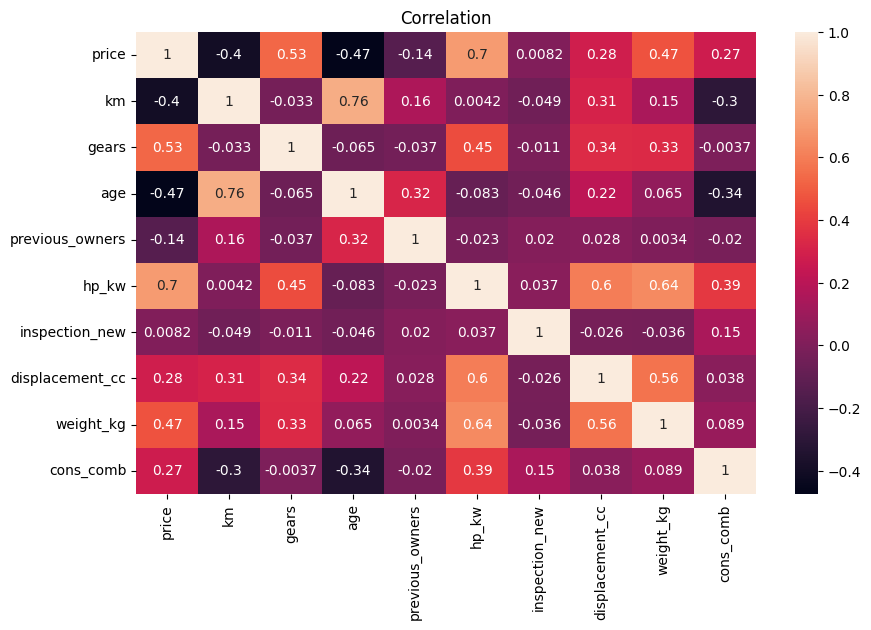

In [45]:
plt.figure(figsize = (10,6))
sns.heatmap(numeric_df.corr(),annot=True)
plt.title("Correlation");

# Train | Test Split

## Splitting the dataset into X (independent variables) and y (dependent variable)

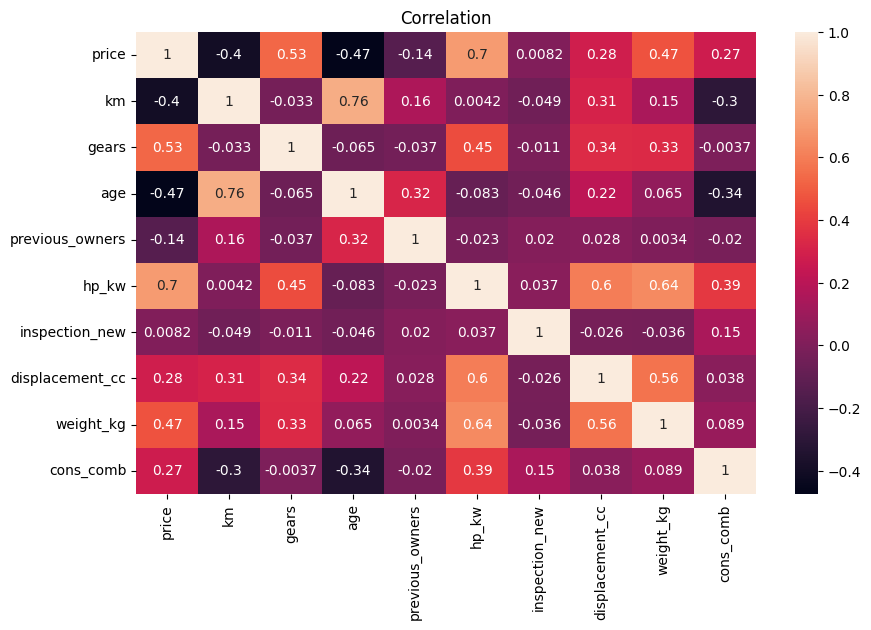

In [48]:
plt.figure(figsize = (10,6))
sns.heatmap(numeric_df.corr(),annot=True)
plt.title("Correlation");

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [50]:
X = df.drop(columns=['price'])  # Independent variables
y = df['price']  # Target variable

# Implement Linear Regression

In [52]:
# Separate numeric and categorical columns
numerical_cols = X.select_dtypes(exclude=['object']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [53]:
# Separate the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# Preprocessing steps for categorical and numerical data
numerical_transformer = StandardScaler()  # Scaling numeric data
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # Encoding categorical data


In [55]:
# Column converter combining numeric and categorical operations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),  # Sayısal veriler için
        ('cat', categorical_transformer, categorical_cols)  # Kategorik veriler için
    ]
)

In [56]:
# Create pipeline: Combine preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())  # Lineer regresyon modeli
])

In [57]:
# Train Pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['km', 'gears', 'age', 'previous_owners', 'hp_kw', 'inspection_new',
       'displacement_cc', 'weight_kg', 'cons_comb'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make_model', 'body_type', 'vat', 'type', 'fuel', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'paint_type',
       'upholstery_type', 'gearing_type', 'drive_chain'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [58]:
# Evaluate model performance
train_score = pipeline.score(X_train, y_train)  # Eğitim setindeki R^2 skoru
test_score = pipeline.score(X_test, y_test)  # Test setindeki R^2 skoru

print(f"Train R^2 Score: {train_score:.4f}")
print(f"Test R^2 Score: {test_score:.4f}")

Train R^2 Score: 0.9838
Test R^2 Score: 0.8743


In [59]:
# BENCE BURDA OVER FIT VAR!!!!

# Implement Ridge Regression

In [61]:
from sklearn.linear_model import Ridge

# Pipeline with Ridge Regression
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))  # Alpha: Regularization strength
])

ridge_pipeline.fit(X_train, y_train)

train_score_ridge = ridge_pipeline.score(X_train, y_train)
test_score_ridge = ridge_pipeline.score(X_test, y_test)

print(f"Train R² Score (Ridge): {train_score_ridge:.4f}")
print(f"Test R² Score (Ridge): {test_score_ridge:.4f}")


Train R² Score (Ridge): 0.9699
Test R² Score (Ridge): 0.9170


In [62]:
# Get the coefficients of the Ridge model
ridge_model = ridge_pipeline.named_steps['model']
coefficients = ridge_model.coef_

# Get feature names after preprocessing
# Combine Numerical and one-hot encoded categorical feature names
feature_names = ridge_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Combine coefficients and property names into a DataFrame
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Katsayıları sıralayarak yazdır
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
pd.DataFrame(coefficients_df)


Feature   Coefficient
1624  cat__comfort_convenience_Air conditioning,Armr...  10761.826616
6346  cat__safety_security_ABS,Adaptive Cruise Contr...  10761.826616
7864  cat__safety_security_ABS,Alarm system,Central ...   9052.445637
2145  cat__comfort_convenience_Air conditioning,Armr...   8785.148506
7865  cat__safety_security_ABS,Alarm system,Central ...   8785.148506
...                                                 ...           ...
5177  cat__comfort_convenience_Cruise control,Electr...  -4237.138106
8187  cat__safety_security_ABS,Central door lock wit...  -4295.938536
15                       cat__make_model_Renault Duster  -4463.855098
2712  cat__comfort_convenience_Air conditioning,Armr...  -4629.353953
2292  cat__comfort_convenience_Air conditioning,Armr...  -5205.275759

[10072 rows x 2 columns]

In [63]:
# Coefficients and names for numerical properties only
numeric_feature_names = numerical_cols  
numeric_coefficients = ridge_model.coef_[:len(numeric_feature_names)]

numeric_coefficients_df = pd.DataFrame({
    'Numeric Feature': numeric_feature_names,
    'Coefficient': numeric_coefficients
}).sort_values(by='Coefficient', ascending=False)

print(numeric_coefficients_df)


   Numeric Feature  Coefficient
4            hp_kw  2517.931619
1            gears   361.239593
8        cons_comb   224.667681
3  previous_owners    33.142300
5   inspection_new    -3.072137
7        weight_kg  -215.216500
6  displacement_cc  -257.933414
0               km -1307.770642
2              age -1819.373842


# Implement Lasso Regression

In [65]:
from sklearn.linear_model import Lasso

In [66]:
# Creating pipelines with Lasso Regression
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1, max_iter=10))  # Alpha: Regularization strength
])

In [67]:
# Modeli eğitme
lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['km', 'gears', 'age', 'previous_owners', 'hp_kw', 'inspection_new',
       'displacement_cc', 'weight_kg', 'cons_comb'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make_model', 'body_type', 'vat', 'type', 'fuel', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'paint_type',
       'upholstery_type', 'gearing_type', 'drive_chain'],
      dtype='object'))])),
                ('model', Lasso(alpha=0.1, max_iter=10))])

In [68]:
train_score_lasso = lasso_pipeline.score(X_train, y_train)
test_score_lasso = lasso_pipeline.score(X_test, y_test)

train_score_lasso, test_score_lasso

(0.9697768549708072, 0.9092471441753079)

In [69]:
lasso_scores = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "R² Score": [train_score_lasso, test_score_lasso]
})

lasso_scores

Dataset  R² Score
0   Train  0.969777
1    Test  0.909247

# Implement Elastic-Net

In [71]:
from sklearn.linear_model import ElasticNet

# creating pipeline with ElasticNet
elastic_net_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000))  # alpha: strength, l1_ratio: mixing parameter
])

elastic_net_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['km', 'gears', 'age', 'previous_owners', 'hp_kw', 'inspection_new',
       'displacement_cc', 'weight_kg', 'cons_comb'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make_model', 'body_type', 'vat', 'type', 'fuel', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'paint_type',
       'upholstery_type', 'gearing_type', 'drive_chain'],
      dtype='object'))])),
                ('model', ElasticNet(alpha=0.1, max_iter=10000))])

In [72]:
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline

elastic_net_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000))
])


In [73]:
elastic_net_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['km', 'gears', 'age', 'previous_owners', 'hp_kw', 'inspection_new',
       'displacement_cc', 'weight_kg', 'cons_comb'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make_model', 'body_type', 'vat', 'type', 'fuel', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'paint_type',
       'upholstery_type', 'gearing_type', 'drive_chain'],
      dtype='object'))])),
                ('model', ElasticNet(alpha=0.1, max_iter=10000))])

In [74]:

elastic_net_scores = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "R² Score": [train_score, test_score]
})

print(elastic_net_scores)

  Dataset  R² Score
0   Train  0.983765
1    Test  0.874275


# Feature Importance

In [76]:
# Let's get the coefficients from the Elastic-Net model.
elastic_net_coefficients = elastic_net_pipeline.named_steps['model'].coef_

elastic_net_feature_names = preprocessor.get_feature_names_out()

# Converting the coefficients and feature names into a DataFrame.
elastic_net_importance_df = pd.DataFrame({
    "Feature": elastic_net_feature_names,
    "Coefficient": elastic_net_coefficients
})

# Sorting the coefficients by their magnitude (for importance ranking).
elastic_net_importance_df["Importance"] = abs(elastic_net_importance_df["Coefficient"])
elastic_net_importance_df = elastic_net_importance_df.sort_values(by="Importance", ascending=False)

elastic_net_importance_df.reset_index(drop=True, inplace=True)
elastic_net_importance_df # .head(10)  En önemli 10 özelliği görüntüleyelim


Feature  Coefficient  \
0                                             num__hp_kw  3114.146967   
1                                               num__age -1873.008615   
2                         cat__make_model_Renault Espace  1850.969707   
3                                cat__make_model_Audi A3  1699.987344   
4                           cat__make_model_Renault Clio -1686.180633   
...                                                  ...          ...   
10067  cat__comfort_convenience_Air conditioning,Armr...    -0.000000   
10068  cat__comfort_convenience_Air conditioning,Armr...     0.000000   
10069  cat__safety_security_ABS,Adaptive headlights,C...    -0.000000   
10070  cat__comfort_convenience_Air conditioning,Armr...    -0.000000   
10071  cat__comfort_convenience_Air conditioning,Armr...     0.000000   

        Importance  
0      3114.146967  
1      1873.008615  
2      1850.969707  
3      1699.987344  
4      1686.180633  
...            ...  
10067     0.000000  
10068     0.000000  
10069     0.000000  
10070     0.000000  
10071     0.000000  

[10072 rows x 3 columns]

# Compare Models Performance

In [78]:
# Combining the scores of all models.
model_comparison = pd.DataFrame({
    "Model": ["Ridge", "Lasso", "Elastic-Net"],
    "Train R²": [train_score_ridge, train_score_lasso, train_score],
    "Test R²": [test_score_ridge, test_score_lasso, test_score]
})

model_comparison


Model  Train R²   Test R²
0        Ridge  0.969889  0.916978
1        Lasso  0.969777  0.909247
2  Elastic-Net  0.983765  0.874275

# Final Model

In [80]:
# Creating the final Ridge Regression model.
final_ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))  # Alpha: Regularization strength
])

In [81]:
# Re-train the model on the entire dataset (Train + Test).
final_ridge_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['km', 'gears', 'age', 'previous_owners', 'hp_kw', 'inspection_new',
       'displacement_cc', 'weight_kg', 'cons_comb'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make_model', 'body_type', 'vat', 'type', 'fuel', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'paint_type',
       'upholstery_type', 'gearing_type', 'drive_chain'],
      dtype='object'))])),
                ('model', Ridge())])

In [82]:
predictions = final_ridge_pipeline.predict(X)

## GridSearchCV en iyi iperparametreleri bulmaya calisalim

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
# Define alpha values for Ridge Regression
param_grid = {'model__alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

In [86]:
# Create the GridSearchCV
ridge_grid_search = GridSearchCV(
    estimator=Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', Ridge())
    ]),
    param_grid=param_grid,
    cv=10,  # 5-fold cross-validation
    scoring='r2',  # Use R² as the evaluation metric
    n_jobs=-1  # Run in parallel
)

In [87]:
# Fit the GridSearchCV to training data
ridge_grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['km', 'gears', 'age', 'previous_owners', 'hp_kw', 'inspection_new',
       'displacement_cc', 'weight_kg', 'cons_comb'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['make_model', 'body_type', 'vat', 'type', 'fuel', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'paint_type',
       'upholstery_type', 'gearing_type', 'drive_chain'],
      dtype='object'))])),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                          0.8, 0.9, 1]},
             scoring='r2')

In [88]:
# Best parameters and score
print("Best Parameters:", ridge_grid_search.best_params_)
print("Best Cross-Validation R² Score:", ridge_grid_search.best_score_)

Best Parameters: {'model__alpha': 1}
Best Cross-Validation R² Score: 0.8996951109969537


In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [90]:
# Predictions for train and test datasets
y_train_pred = ridge_grid_search.best_estimator_.predict(X_train)
y_test_pred = ridge_grid_search.best_estimator_.predict(X_test)

# Calculate evaluation metrics
metrics = {
    "Dataset": ["Train", "Test"],
    "R² Score": [
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)
    ],
    "MAE": [
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)
    ],
    "MSE": [
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_train, y_train_pred)),
        np.sqrt(mean_squared_error(y_test, y_test_pred))
    ]
}

# Convert metrics dictionary into a DataFrame
evaluation_df = pd.DataFrame(metrics)
evaluation_df

Dataset  R² Score          MAE           MSE         RMSE
0   Train  0.969889   853.119904  1.644392e+06  1282.338426
1    Test  0.916978  1415.350050  4.480519e+06  2116.723626

In [91]:
# The average of the target variable.
y_mean = y_train.mean()

# Hataların normalleştirilmesi
train_mae_percent = (853.12 / y_mean) * 100
test_mae_percent = (1415.35 / y_mean) * 100

train_rmse_percent = (1282.34 / y_mean) * 100
test_rmse_percent = (2116.72 / y_mean) * 100

# Sonuçları bir DataFrame olarak gösterme
comparison = pd.DataFrame({
    "Metric": ["MAE (%)", "RMSE (%)"],
    "Train": [train_mae_percent, train_rmse_percent],
    "Test": [test_mae_percent, test_rmse_percent]
})

print(comparison)


     Metric     Train       Test
0   MAE (%)  4.725002   7.838910
1  RMSE (%)  7.102235  11.723445


## **Interpreting the Results**
1. **MAE (%)**:
   - For the training set, the average error is approximately **4.73%** of the target variable's mean.
   - For the test set, the error is around **7.84%** of the mean.
   - The test error is slightly higher, with a difference of about **3.1%**, which indicates a minor decrease in performance on unseen data. However, this difference is not significant enough to indicate overfitting.

2. **RMSE (%)**:
   - RMSE is more sensitive to large errors compared to MAE. In the training set, the RMSE is about **7.10%** of the mean, while in the test set, it's around **11.72%**.
   - The gap between training and test errors is approximately **4.62%**, which is notable but still within an acceptable range.

### **Overall Evaluation**
- The percentage differences between training and test errors are relatively small.
- The higher error percentage in the test set indicates a slight drop in generalization performance, but it does not signify overfitting.
- Both MAE and RMSE percentages are low relative to the target variable's mean, which suggests that the model performs well overall.

### **Conclusion**
Your model is performing well, with acceptable generalization. However, to further improve performance:
1. **Add more data** to enhance the model's generalization capability.
2. **Fine-tune regularization** parameters (e.g., the `alpha` for Ridge or Elastic-Net).
3. Consider simplifying the model to reduce potential variance.

That said, the current performance is reliable, and the model can be considered well-suited for practical use.

## Model Deployment

In [175]:
import pickle 

In [184]:
pickle.dump(ridge_grid_search, open("ridge_grid_search", "wb"))

# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Hope It Will Be Useful, Thank You</b></p>
